# Практика

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import math
from statsmodels.stats.weightstats import _zconfint_generic
import warnings


warnings.filterwarnings('ignore')
%matplotlib inline

## ЦПТ для различных распределений
Возьмите то непрерывное распределение, которое вам больше всего понравится из списка доступных в модуле [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html).

### Сгенерируйте примеры из распределения

In [12]:
# ваш код тут
# например вот такое распределение https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.cosine.html#scipy.stats.cosine
cosine_rv = sts.cosine()

cosine_sample_10 = cosine_rv.rvs(10)
cosine_sample_100 = cosine_rv.rvs(100)
cosine_sample_1000 = cosine_rv.rvs(1_000)
cosine_sample_10000 = cosine_rv.rvs(10_000)

In [13]:
cosine_mean = cosine_rv.mean() # настоящее среднее случайной величины
sample_mean_10 = cosine_sample_10.mean()
sample_mean_100 = cosine_sample_100.mean()
sample_mean_1000 = cosine_sample_1000.mean()
sample_mean_10000 = cosine_sample_10000.mean()

print(*[sample_mean_10, sample_mean_100, sample_mean_1000, sample_mean_10000], sep='\n')


-0.49250093321176464
-0.07624422389194527
-0.06261501494185188
0.00547741785696755


In [14]:
cosine_var = cosine_rv.var() # настоящая дисперсия случайной величины
sample_var_10 = cosine_sample_10.var()
sample_var_100 = cosine_sample_100.var()
sample_var_1000 = cosine_sample_1000.var()
sample_var_10000 = cosine_sample_10000.var()

print(*[sample_var_10, sample_var_100, sample_var_1000, sample_var_10000], sep='\n')

0.6660270593323209
1.122787913771819
1.3356505928869133
1.2674795702214943


### Постройте гистограмму выборки и теоретическую плотность распределения

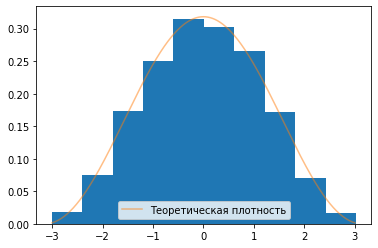

In [15]:
# ваш код тут
plt.hist(cosine_sample_10000, density=True)
x = np.linspace(-3, 3, 10_000)
pdf = cosine_rv.pdf(x)
plt.plot(x, pdf, label='Теоретическая плотность', alpha=0.5)
plt.legend()


### Оценим распределение выборочного среднего для разных объёмов выборок
Для этого постройте на одном полотне гистограмму выборочных средних и теоретическое распределение выборочных средних по ЦПТ для разных объёмов выборок.

Для теоретического распределение используйте настоящие значения мат ожидания и дисперсии (не приближенные на основе выборки).

C:\Users\A\AppData\Local\Temp\ipykernel_5932\2298575067.py:7: RuntimeWarning: Mean of empty slice.
  cosine_means.append(cosine_rv.rvs(i).mean())


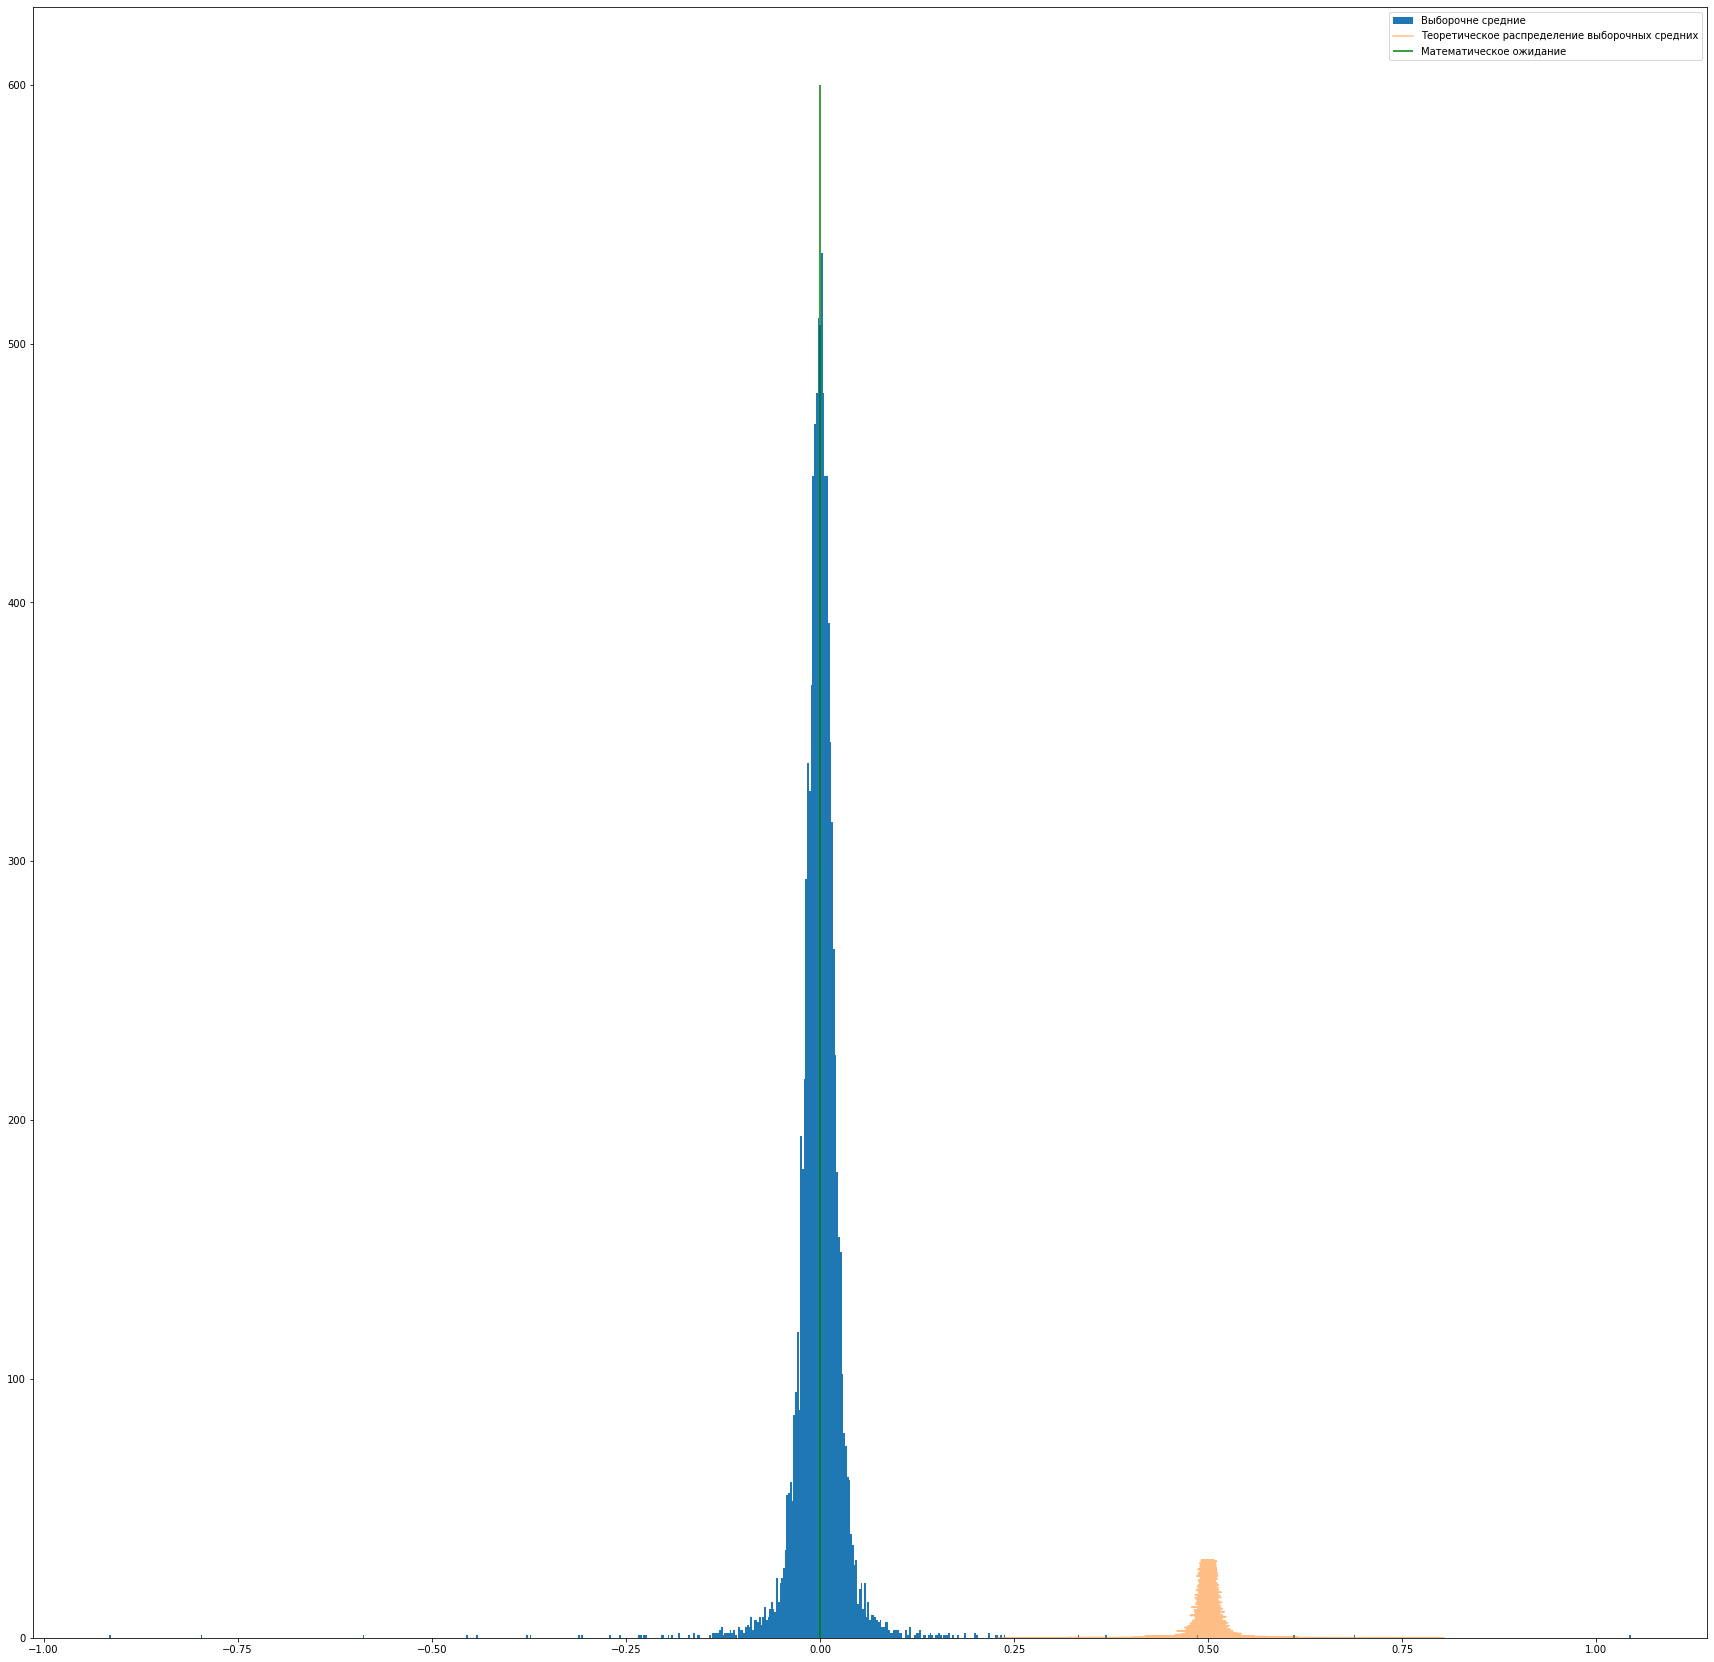

In [35]:
# ваш код тут
x = np.linspace(0,30,10_000)

cosine_means = []

for i in range(10_000):
    cosine_means.append(cosine_rv.rvs(i).mean())
    
cosine_means_cdf = cosine_rv.cdf(cosine_means)

plt.figure(figsize=(30,30))

plt.hist(cosine_means, bins='auto', label='Выборочне средние')
plt.plot(cosine_means_cdf, x, label='Теоретическое распределение выборочных средних', alpha=0.5)
plt.vlines(cosine_mean,0,600, color='green', label='Математическое ожидание')
plt.legend()

Как вы считаете, для выбранного распределения апроксимация распределения выборочного среднего работает хорошо или плохо?
**Ваш ответ:**

Для выбранного распределения апроксимация работает плохо, т.к. гистограмма выборочных средних и теоретического распределения выборочных средних различны

## Доверительный интервал на основе ЦПТ
Возьмите данные для оттока телеком компании, и постройте доверительные интервалы для среднего значения total day calls, используя центральную предельную теорему в разбиении по колонке churn (ушел/не ушел). 

Для оценки дисперсии используйте несмещенную оценку (параметр ddof=1).

Сделайте оценку с использованием явной формулы для z интервала, а затем с помощью функций 
`from statsmodels.stats.weightstats import _zconfint_generic`. Сравните результаты.


Ссылка на данные: https://drive.google.com/file/d/1X_drKqoarnU2Sz2har7uSCsgyhh8Xtz8/view?usp=sharing

In [22]:
# либо загружаем из альтернативного хранилища
url ="https://raw.githubusercontent.com/piton1/DS/Lesson_5/telecom_churn.csv"
df=pd.read_csv(url)
display(df)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


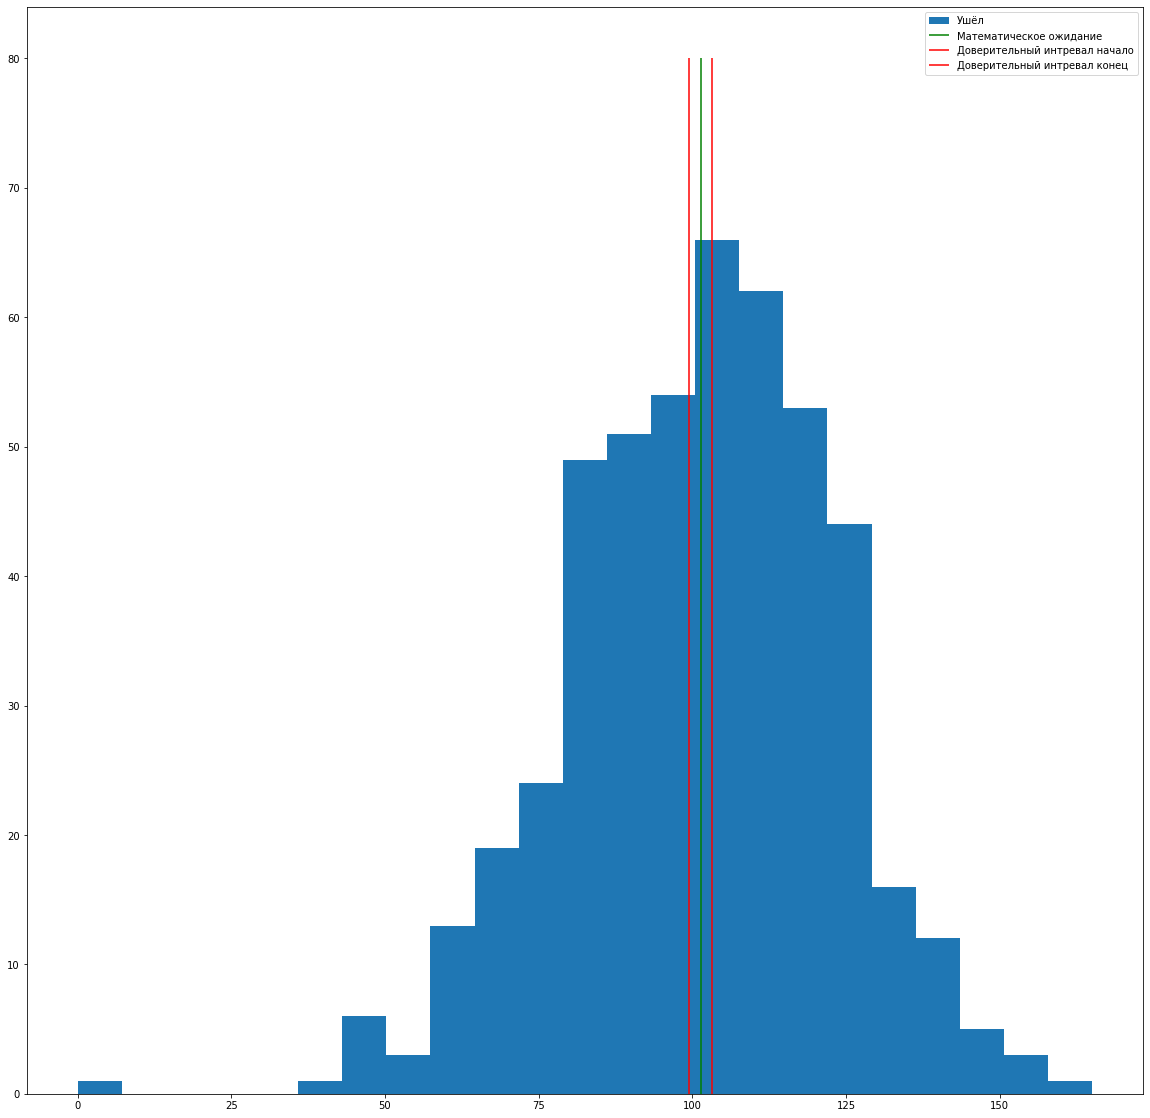

In [40]:
df_filtered_true = df[~df['churn'] == False]['total day calls']

df_mean = df_filtered_true.mean()
df_var = df_filtered_true.var()
df_std = df_filtered_true.std()

trusted_span_start = df_mean - 1.96 * df_std / np.sqrt(len(df_filtered_true))
trusted_span_end = df_mean + 1.96 *df_std /np.sqrt(len(df_filtered_true))
trusted_span_norm = sts.norm.interval(
    alpha=0.95, loc=df_mean, scale=np.std(df_filtered_true, ddof=1) / np.sqrt(len(df_filtered_true))
)
trusted_span = _zconfint_generic(df_mean, np.std(df_filtered_true, ddof=1), alpha=0.95, alternative='two-sided')


plt.figure(figsize=(20,20))
plt.hist(df_filtered_true, bins='auto', label='Ушёл')
plt.vlines(df_mean,0,80, color='green', label='Математическое ожидание')
plt.vlines(trusted_span_start,0,80, color='red', label='Доверительный интревал начало')
plt.vlines(trusted_span_end,0,80, color='red', label='Доверительный интревал конец')
plt.legend()

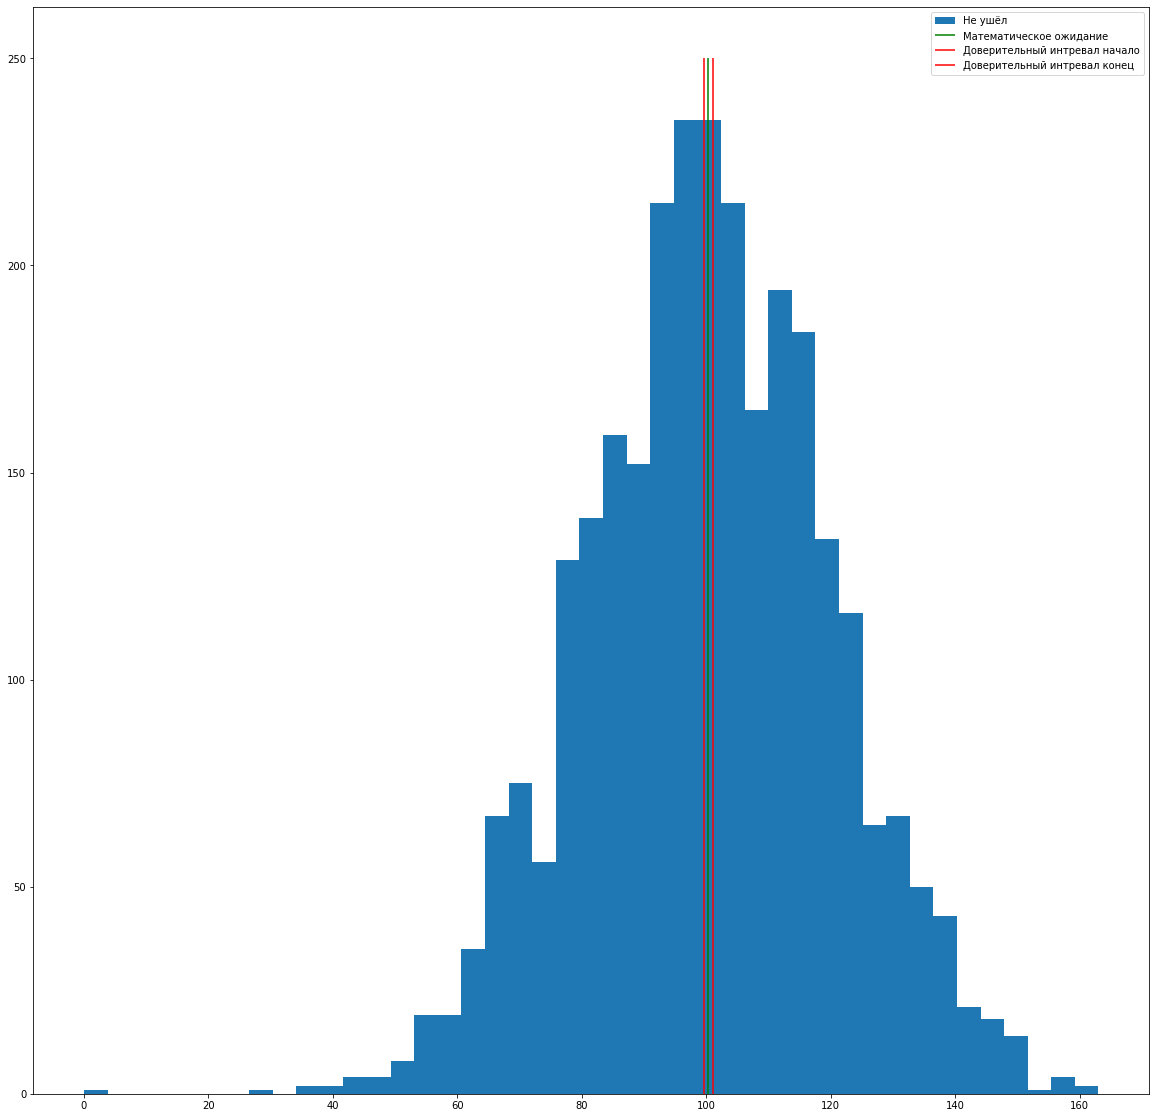

In [43]:
df_filtered_false = df[df['churn'] == False]['total day calls']

df_mean = df_filtered_false.mean()
df_var = df_filtered_false.var()
df_std = df_filtered_false.std()

trusted_span_start = df_mean - 1.96 * df_std / np.sqrt(len(df_filtered_false))
trusted_span_end = df_mean + 1.96 *df_std /np.sqrt(len(df_filtered_false))
trusted_span_norm = sts.norm.interval(
    alpha=0.95, loc=df_mean, scale=np.std(df_filtered_false, ddof=1) / np.sqrt(len(df_filtered_false))
)
trusted_span = _zconfint_generic(df_mean, np.std(df_filtered_false, ddof=1), alpha=0.95, alternative='two-sided')


plt.figure(figsize=(20,20))
plt.hist(df_filtered_false, bins='auto', label='Не ушёл')
plt.vlines(df_mean,0,250, color='green', label='Математическое ожидание')
plt.vlines(trusted_span_start,0,250, color='red', label='Доверительный интревал начало')
plt.vlines(trusted_span_end,0,250, color='red', label='Доверительный интревал конец')
plt.legend()